# Week4 - HW 2

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemanda) for at least 10 days and not more than 40 days. 

1. Create two bar graphs of the power consumption per hour. 
    a. One bar graph has 24 bars; 
    b. one bar graph has 24 times number of days bars. 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
!head /Users/tej/Desktop/RollingSystemDemand1.csv

HDR,ROLLING SYSTEM DEMAND
VD,20210901000000,22640
VD,20210901000500,22558
VD,20210901001000,22443
VD,20210901001500,22466
VD,20210901002000,22413
VD,20210901002500,22278
VD,20210901003000,22189
VD,20210901003500,22282
VD,20210901004000,22267


In [3]:
!head /Users/tej/Desktop/RollingSystemDemand2.csv

HDR,ROLLING SYSTEM DEMAND
VD,20210908000000,23472
VD,20210908000500,23397
VD,20210908001000,23380
VD,20210908001500,23333
VD,20210908002000,23268
VD,20210908002500,23174
VD,20210908003000,23058
VD,20210908003500,22829
VD,20210908004000,22832


In [4]:
df1= pd.read_csv("/Users/tej/Desktop/RollingSystemDemand1.csv", names =['VD', 'measurement_time', 'demand_level'], skiprows=1, parse_dates = [1])







In [5]:
df2= pd.read_csv("/Users/tej/Desktop/RollingSystemDemand2.csv", names =['VD', 'measurement_time', 'demand_level'], skiprows=1, parse_dates = [1])




In [6]:
df1

,VD,measurement_time,demand_level
0,VD,2021-09-01 00:00:00,22640.0
1,VD,2021-09-01 00:05:00,22558.0
2,VD,2021-09-01 00:10:00,22443.0
3,VD,2021-09-01 00:15:00,22466.0
4,VD,2021-09-01 00:20:00,22413.0
...,...,...,...
1996,VD,2021-09-07 22:20:00,26087.0
1997,VD,2021-09-07 22:25:00,25904.0
1998,VD,2021-09-07 22:30:00,25669.0
1999,VD,2021-09-07 22:35:00,25536.0


In [7]:
df2

,VD,measurement_time,demand_level
0,VD,2021-09-08 00:00:00,23472.0
1,VD,2021-09-08 00:05:00,23397.0
2,VD,2021-09-08 00:10:00,23380.0
3,VD,2021-09-08 00:15:00,23333.0
4,VD,2021-09-08 00:20:00,23268.0
...,...,...,...
1996,VD,2021-09-14 22:20:00,26233.0
1997,VD,2021-09-14 22:25:00,25996.0
1998,VD,2021-09-14 22:30:00,25818.0
1999,VD,2021-09-14 22:35:00,25734.0


In [8]:
print(df1.shape)
print(df2.shape)

(2001, 3)
(2001, 3)


In [9]:
df1=df1.drop(labels=2000)

In [10]:
df2=df2.drop(labels=2000)

In [11]:
frames = [df1, df2,]

df = pd.concat(frames, ignore_index= True)

In [12]:
df.shape

(4000, 3)

In [13]:
df

,VD,measurement_time,demand_level
0,VD,2021-09-01 00:00:00,22640.0
1,VD,2021-09-01 00:05:00,22558.0
2,VD,2021-09-01 00:10:00,22443.0
3,VD,2021-09-01 00:15:00,22466.0
4,VD,2021-09-01 00:20:00,22413.0
...,...,...,...
3995,VD,2021-09-14 22:15:00,26415.0
3996,VD,2021-09-14 22:20:00,26233.0
3997,VD,2021-09-14 22:25:00,25996.0
3998,VD,2021-09-14 22:30:00,25818.0


In [14]:
df['measurement_time']

0      2021-09-01 00:00:00
1      2021-09-01 00:05:00
2      2021-09-01 00:10:00
3      2021-09-01 00:15:00
4      2021-09-01 00:20:00
               ...        
3995   2021-09-14 22:15:00
3996   2021-09-14 22:20:00
3997   2021-09-14 22:25:00
3998   2021-09-14 22:30:00
3999   2021-09-14 22:35:00
Name: measurement_time, Length: 4000, dtype: datetime64[ns]

In [15]:
len(df)

4000

In [16]:
times = pd.DatetimeIndex(df.measurement_time)
df.groupby([times.hour, times.minute]).demand_level.sum()

measurement_time  measurement_time
0                 0                   321345.0
                  5                   320736.0
                  10                  319953.0
                  15                  319336.0
                  20                  318513.0
                                        ...   
23                35                  279660.0
                  40                  278811.0
                  45                  277933.0
                  50                  277247.0
                  55                  276313.0
Name: demand_level, Length: 288, dtype: float64

In [17]:
times

DatetimeIndex(['2021-09-01 00:00:00', '2021-09-01 00:05:00',
               '2021-09-01 00:10:00', '2021-09-01 00:15:00',
               '2021-09-01 00:20:00', '2021-09-01 00:25:00',
               '2021-09-01 00:30:00', '2021-09-01 00:35:00',
               '2021-09-01 00:40:00', '2021-09-01 00:45:00',
               ...
               '2021-09-14 21:50:00', '2021-09-14 21:55:00',
               '2021-09-14 22:00:00', '2021-09-14 22:05:00',
               '2021-09-14 22:10:00', '2021-09-14 22:15:00',
               '2021-09-14 22:20:00', '2021-09-14 22:25:00',
               '2021-09-14 22:30:00', '2021-09-14 22:35:00'],
              dtype='datetime64[ns]', name='measurement_time', length=4000, freq=None)

In [18]:
avg_demand = df.groupby([times.hour])['demand_level'].mean()
avg_demand

measurement_time
0     22713.464286
1     22296.208333
2     21989.898810
3     21944.410714
4     22391.755952
5     24484.958333
6     27512.958333
7     29426.958333
8     29989.047619
9     29790.023810
10    29525.267857
11    29508.309524
12    29240.488095
13    28848.690476
14    29049.190476
15    30273.648810
16    31860.738095
17    32464.315476
18    32424.226190
19    32062.255952
20    30157.988095
21    27850.714286
22    25406.531250
23    23483.104167
Name: demand_level, dtype: float64

In [19]:
hour = list(range(0, 24))

print(hour)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Text(0, 0.5, 'demand')

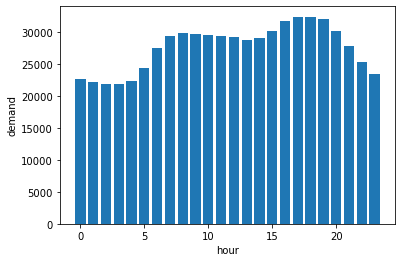

In [20]:
#
plt.bar(hour,avg_demand)
plt.xlabel('hour')
plt.ylabel('demand')

In [21]:
groups = df.groupby(times)

In [22]:
mean = []
dates = []
for i in range(1, 14):
    for j in range(24):
        data = df.set_index('measurement_time')['2021-09-'+ str(i) +' ' + str(j)+':00:00' : '2021-09-' + str(i) +' ' + str(j)+':59:59']
        mean.append(data["demand_level"].mean())

In [23]:
data.set_index('demand_level')

,VD
demand_level,
23416.0,VD
23438.0,VD
23386.0,VD
23270.0,VD
23158.0,VD
23058.0,VD
22975.0,VD
22940.0,VD
22835.0,VD


In [24]:
data

,VD,demand_level
measurement_time,,
2021-09-13 23:00:00,VD,23416.0
2021-09-13 23:05:00,VD,23438.0
2021-09-13 23:10:00,VD,23386.0
2021-09-13 23:15:00,VD,23270.0
2021-09-13 23:20:00,VD,23158.0
2021-09-13 23:25:00,VD,23058.0
2021-09-13 23:30:00,VD,22975.0
2021-09-13 23:35:00,VD,22940.0
2021-09-13 23:40:00,VD,22835.0


In [25]:
print(mean)

[22340.166666666668, 21843.5, 21563.416666666668, 21618.166666666668, 22508.583333333332, 23987.75, 28253.5, 31170.25, 31775.583333333332, 31558.5, 31474.416666666668, 31591.416666666668, 31614.25, 31451.75, 31501.833333333332, 31663.25, 32818.416666666664, 33116.333333333336, 33258.75, 33077.75, 31283.083333333332, 28493.583333333332, 25661.75, 23415.75, 22435.75, 22233.0, 21837.916666666668, 21983.583333333332, 22564.25, 24942.416666666668, 29183.25, 31613.666666666668, 32402.666666666668, 32523.583333333332, 31521.916666666668, 31685.166666666668, 31595.833333333332, 30921.75, 31002.916666666668, 31689.916666666668, 32613.583333333332, 32898.0, 32733.333333333332, 32892.416666666664, 31274.166666666668, 29038.083333333332, 26592.583333333332, 24464.0, 23852.583333333332, 22903.916666666668, 22805.666666666668, 22881.75, 23689.666666666668, 25925.083333333332, 29092.083333333332, 31085.25, 31623.25, 31127.5, 30914.666666666668, 30737.916666666668, 30345.083333333332, 29598.1666666666

In [26]:
mean = [x for x in mean if math.isnan(x) == False]
print(mean)

[22340.166666666668, 21843.5, 21563.416666666668, 21618.166666666668, 22508.583333333332, 23987.75, 28253.5, 31170.25, 31775.583333333332, 31558.5, 31474.416666666668, 31591.416666666668, 31614.25, 31451.75, 31501.833333333332, 31663.25, 32818.416666666664, 33116.333333333336, 33258.75, 33077.75, 31283.083333333332, 28493.583333333332, 25661.75, 23415.75, 22435.75, 22233.0, 21837.916666666668, 21983.583333333332, 22564.25, 24942.416666666668, 29183.25, 31613.666666666668, 32402.666666666668, 32523.583333333332, 31521.916666666668, 31685.166666666668, 31595.833333333332, 30921.75, 31002.916666666668, 31689.916666666668, 32613.583333333332, 32898.0, 32733.333333333332, 32892.416666666664, 31274.166666666668, 29038.083333333332, 26592.583333333332, 24464.0, 23852.583333333332, 22903.916666666668, 22805.666666666668, 22881.75, 23689.666666666668, 25925.083333333332, 29092.083333333332, 31085.25, 31623.25, 31127.5, 30914.666666666668, 30737.916666666668, 30345.083333333332, 29598.1666666666

In [27]:
len(mean)

311

In [28]:
days_hour = list(range(len(mean)))

print(days_hour)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

Text(0, 0.5, 'Average of demand level (MW)')

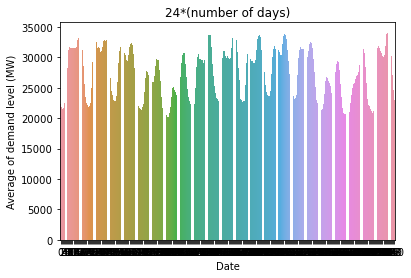

In [29]:
sns.barplot(x=days_hour,y=mean)
plt.title('24*(number of days)')
plt.xticks(days_hour)
plt.xlabel('Date')
plt.ylabel('Average of demand level (MW)')
